# Decision Tress and Random Forest

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. 

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Handling Null values

In [6]:
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

There are no null values.

## Data Visualization

In [7]:
corr = dataset.corr()
corr

C:\Users\Siri\AppData\Local\Temp\ipykernel_896\897440734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


C:\Users\Siri\AppData\Local\Temp\ipykernel_896\2571642465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

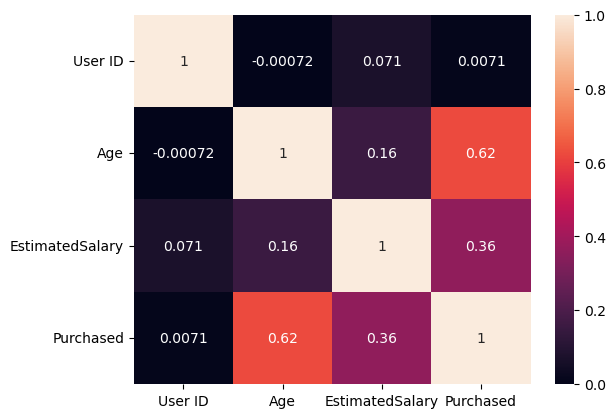

In [8]:
sns.heatmap(dataset.corr(), annot = True)

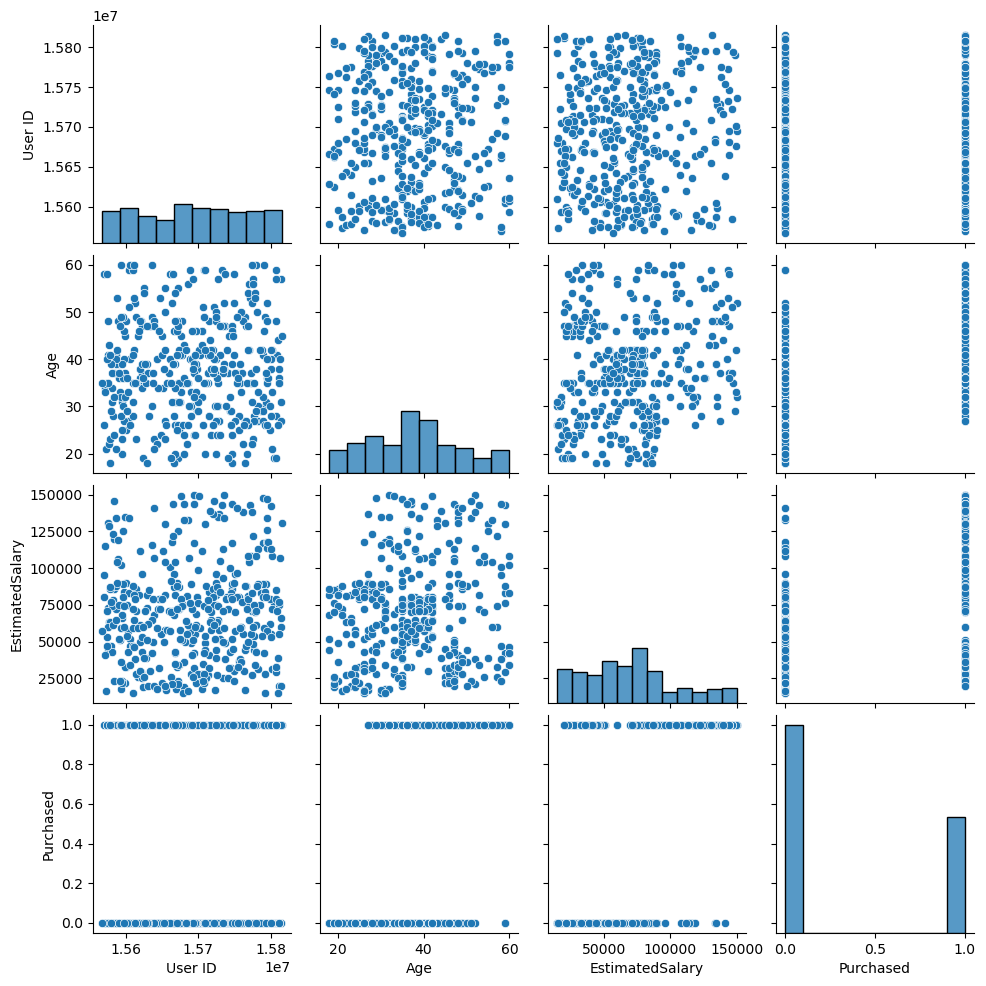

In [9]:
sns.pairplot(dataset)

<Axes: xlabel='Purchased', ylabel='Age'>

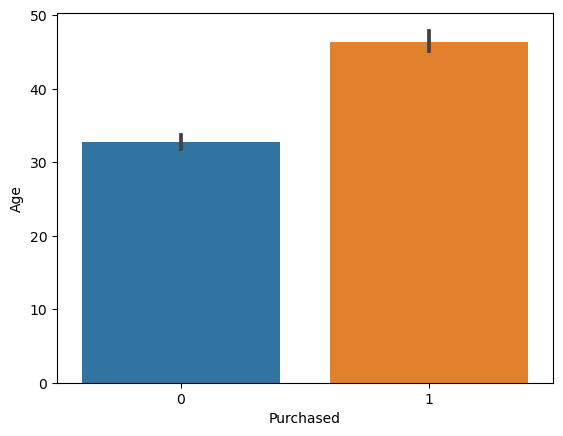

In [10]:
sns.barplot(x = dataset["Purchased"], y = dataset["Age"])

## Outlier Detection

sns.boxplot(dataset["EstimatedSalary"])

<Axes: >

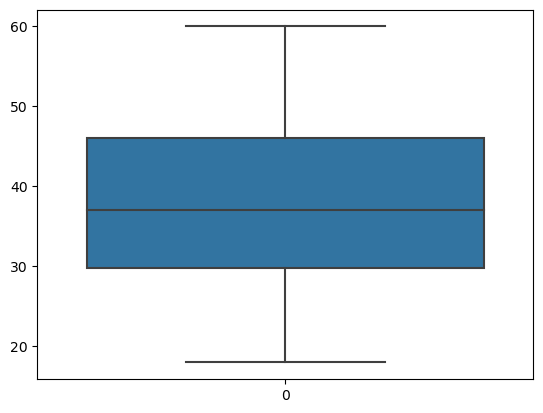

In [11]:
sns.boxplot(dataset["Age"])

We can see that there are no outliers.

## Separating Dependent and Independent variables

We can observe that _Purchased_ variable is an independent variable and _Gender_, _Salary_ and _EstimatedSalary_ are dependent variables.

In [12]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
X = dataset.iloc[:, 1:4]
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [14]:
Y = dataset["Purchased"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Encoding the categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [16]:
X["Gender"] = LE.fit_transform(X["Gender"])
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [17]:
encoding = dict(zip(LE.classes_, range(len(LE.classes_))))
encoding

{'Female': 0, 'Male': 1}

## Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

In [19]:
X_Scaled = pd.DataFrame(MS.fit_transform(X), columns = X.columns)
X_Scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


## Splitting the data into train and test sets

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (320, 3)
Shape of x_test: (80, 3)
Shape of y_train: (320,)
Shape of y_test: (80,)


## Model Building - Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [22]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
pred = dtc.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

## Evaluation of the model

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.8875

In [25]:
confusion_matrix(y_test,pred)

array([[52,  6],
       [ 3, 19]], dtype=int64)

In [26]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,52,6
1,3,19


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [28]:
probability = dtc.predict_proba(x_test)[:,1]
probability

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.])

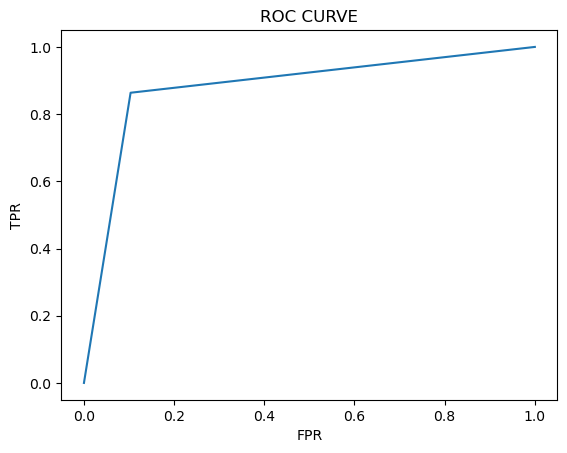

In [29]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## Hyperparameter Tuning

[Text(0.4652777777777778, 0.9666666666666667, 'x[1] <= 0.631\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.26666666666666666, 0.9, 'x[2] <= 0.559\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.17777777777777778, 0.8333333333333334, 'x[1] <= 0.44\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.15555555555555556, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.2, 0.7666666666666667, 'x[2] <= 0.507\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.17777777777777778, 0.7, 'x[2] <= 0.389\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.15555555555555556, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.2, 0.6333333333333333, 'x[2] <= 0.411\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.17777777777777778, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.5666666666666667, 'x[1] <= 0.56\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.17

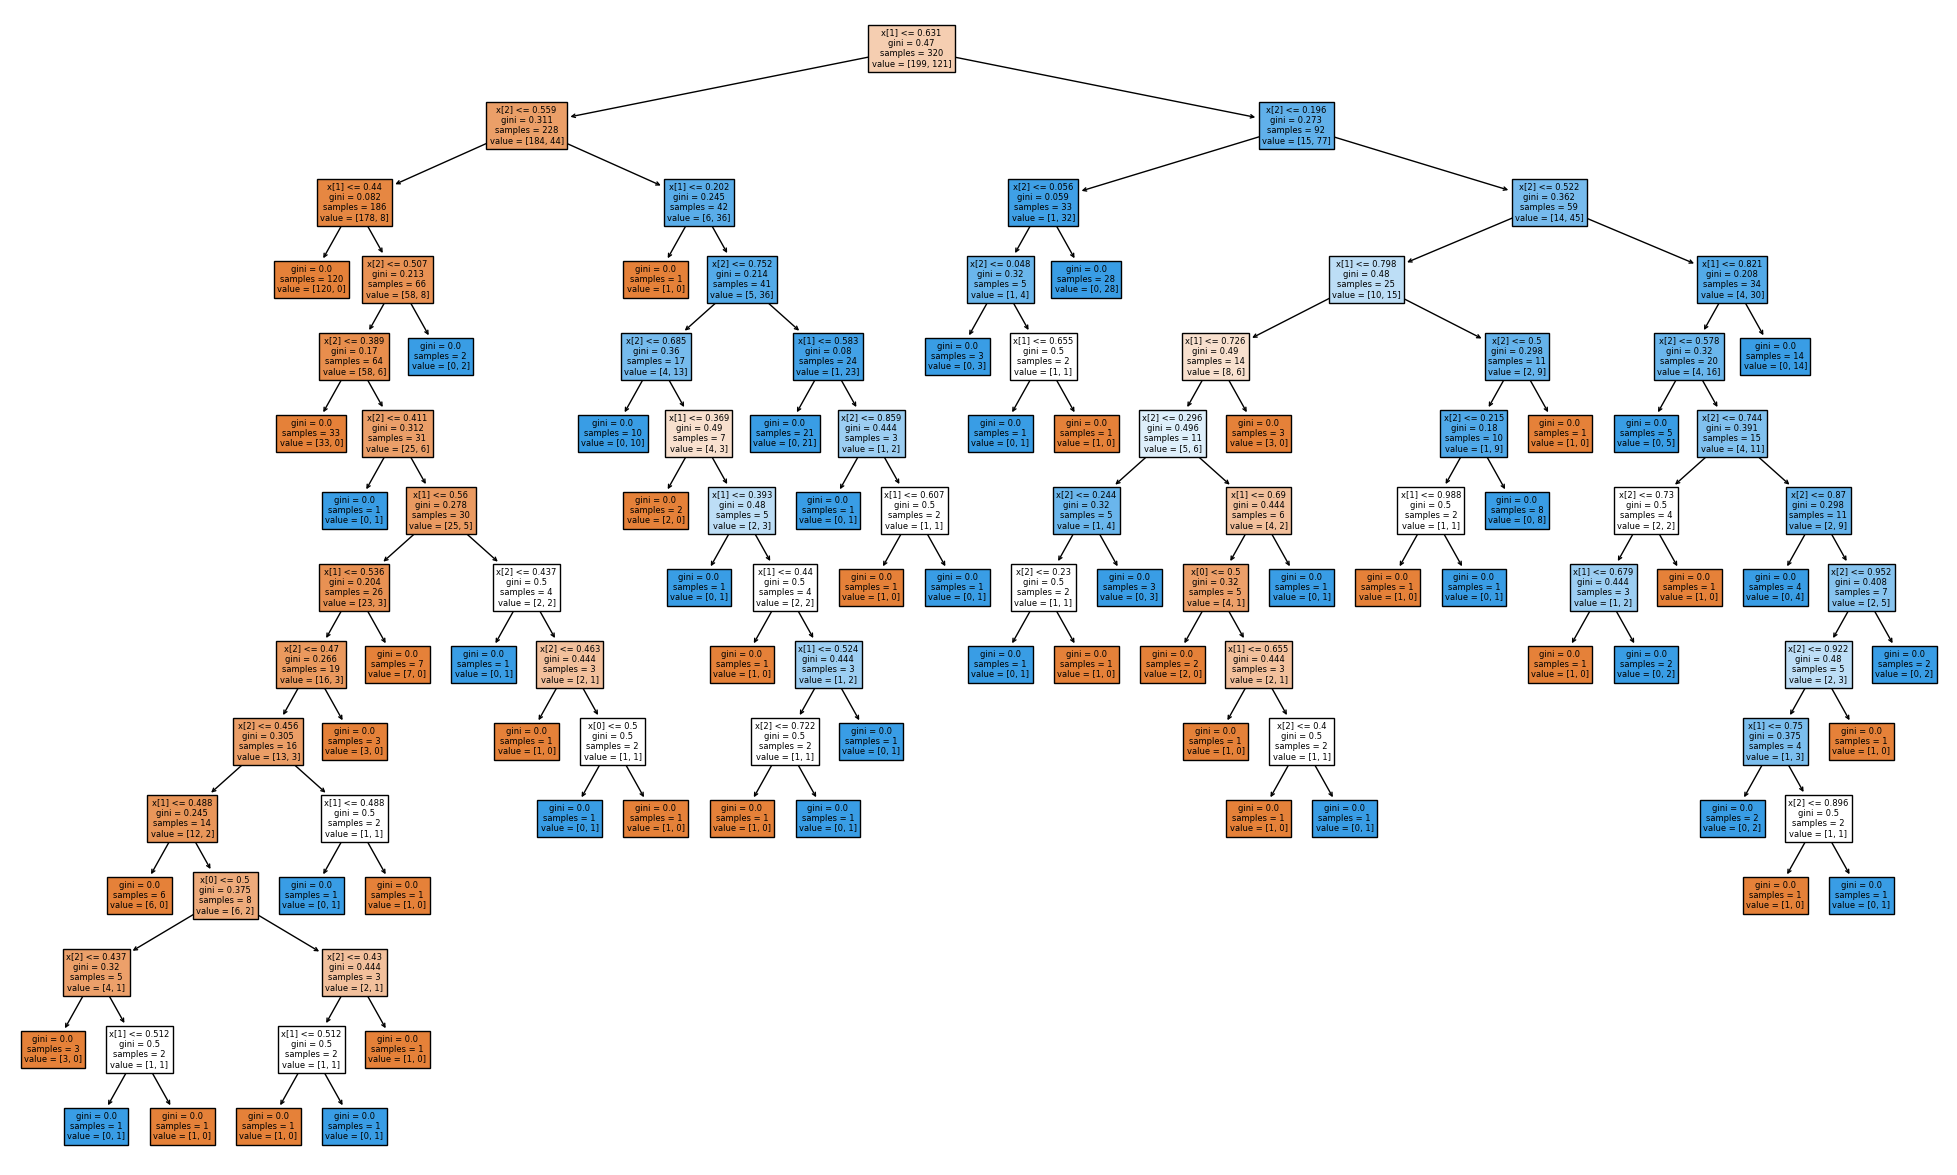

In [30]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [31]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [32]:
grid_search = GridSearchCV(estimator = dtc,param_grid = parameter,cv = 5,scoring = "accuracy")

In [33]:
grid_search.fit(x_train,y_train)

C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [35]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [36]:
pred=dtc_cv.predict(x_test)

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



## Model Building - Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [39]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [40]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")
rfc_cv.fit(x_train,y_train)

C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Siri\anaconda3\Lib\site-packages\skle

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [41]:
pred = rfc_cv.predict(x_test)

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



## Evaluation of Classification model

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.925

In [44]:
confusion_matrix(y_test,pred)

array([[54,  4],
       [ 2, 20]], dtype=int64)

In [45]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,54,4
1,2,20


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



## Hyperprameter Tuning

In [47]:
rfc_cv.best_params_

{'max_depth': 14, 'max_features': 1}

In [48]:
rfc_cv=RandomForestClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt')
rfc_cv.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [49]:
pred = rfc_cv.predict(x_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

